# Importing Dataset

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd 
import seaborn as sns

In [2]:

df= pd.read_csv('manual_30min_norm.csv')


# Preprocessing Data 

In [3]:
df.describe()


,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
count,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,1.106410e+05
mean,0.468309,0.561586,0.585491,0.524408,0.399311,0.396514,1.478866e+09
std,0.258924,0.059871,0.040076,0.125889,0.125387,0.080811,5.749101e+07
min,0.000000,0.461538,0.138462,0.123077,0.000000,0.000000,1.379290e+09
25%,0.264587,0.511218,0.553846,0.553846,0.373054,0.368676,1.429078e+09
50%,0.410539,0.534982,0.600000,0.568292,0.439034,0.383929,1.478866e+09
75%,0.631303,0.615385,0.615385,0.584615,0.476923,0.405506,1.528654e+09
max,1.000000,1.000000,0.646154,0.676923,0.615385,1.000000,1.578442e+09


In [4]:
df_info = df.info()
df_head = df.head()            


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110641 entries, 0 to 110640
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TIME    110641 non-null  object 
 1   FM1     110641 non-null  float64
 2   PE1     110641 non-null  float64
 3   PE2     110641 non-null  float64
 4   PE3     110641 non-null  float64
 5   PE4     110641 non-null  float64
 6   TP1     110641 non-null  float64
 7   EPOCH   110641 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 6.8+ MB


## Missing Value

In [5]:
# Check for missing values
print(df.isnull().sum())

# Optionally, you can drop rows or fill missing values
df = df.dropna()  # or df.fillna(value)


TIME     0
FM1      0
PE1      0
PE2      0
PE3      0
PE4      0
TP1      0
EPOCH    0
dtype: int64


## Dulpicate

In [6]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Display the number of duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, display the duplicate rows themselves
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(df[duplicates])


Number of duplicate rows: 0


# EDA

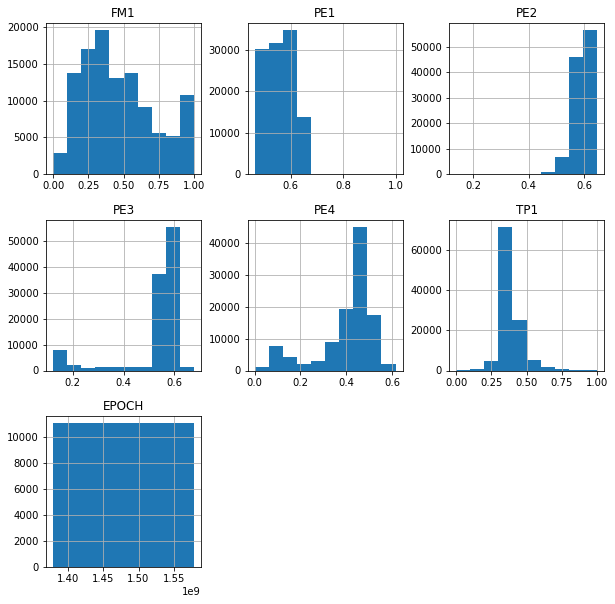

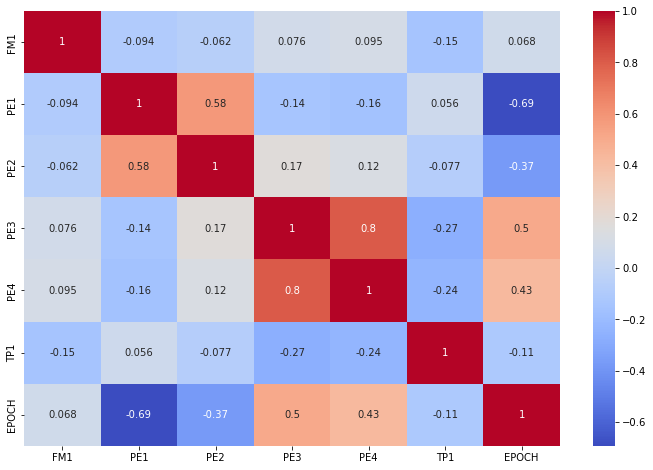

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for each feature
df.hist(figsize=(10, 10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


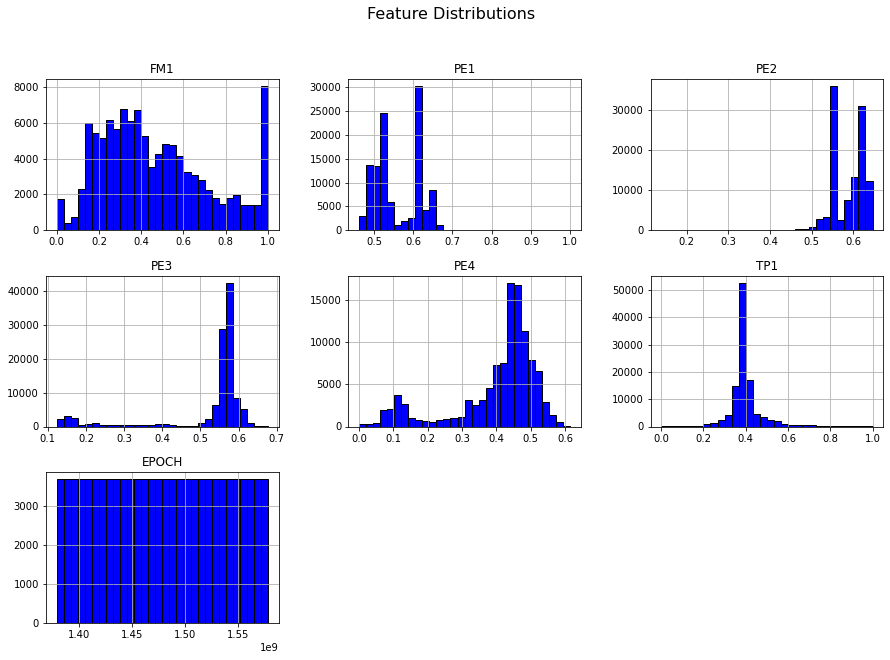

In [8]:
import numpy as np  # Ensure numpy is imported
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Plot histograms for each numerical feature
df[numerical_columns].hist(figsize=(15, 10), bins=30, color='blue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


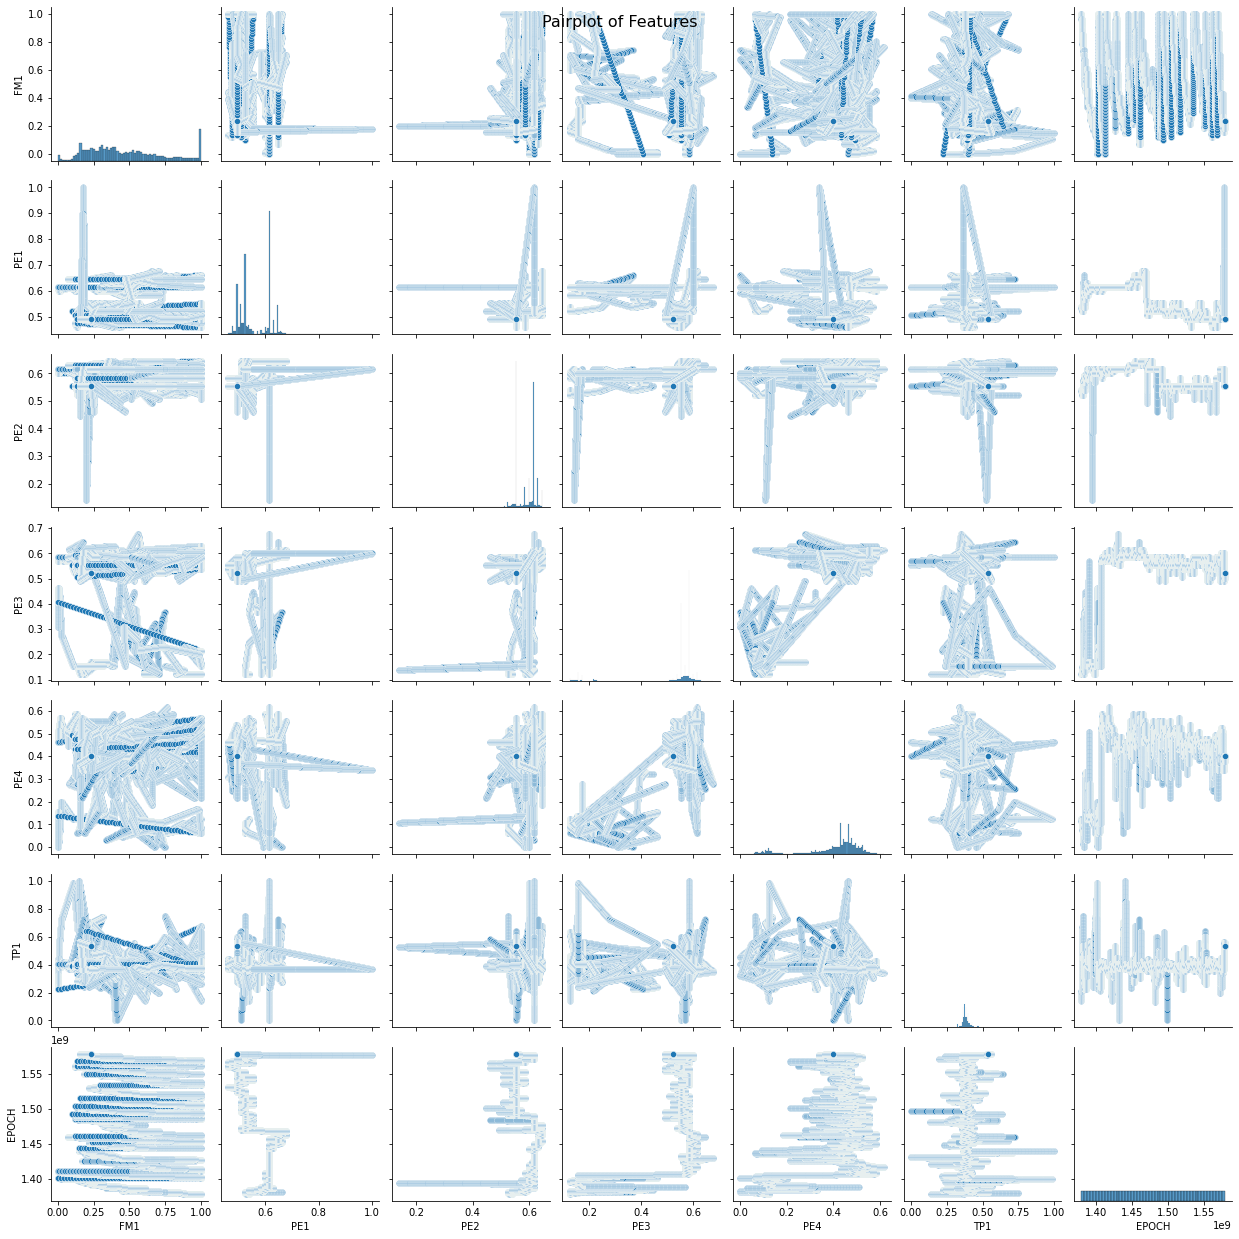

In [9]:
# Pairplot for all features
sns.pairplot(df)
plt.suptitle('Pairplot of Features', fontsize=16)
plt.show()


In [10]:
# Handling missing values (if any)
df_clean = df.dropna()  # Drop rows with missing values

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[numerical_columns])

# Convert scaled features back to DataFrame for further use
df_scaled = pd.DataFrame(scaled_features, columns=numerical_columns)

# Feature selection

## Variance Threshold

In [11]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold; 0.01 means features with less than 1% variance will be removed
selector = VarianceThreshold(threshold=0.01)
df_high_variance = selector.fit_transform(df[numerical_columns])

# Get the columns that were kept
selected_columns = df[numerical_columns].columns[selector.get_support()]

# Convert the selected features back to a DataFrame
df_selected = pd.DataFrame(df_high_variance, columns=selected_columns)

print(f"Selected features after variance threshold: {selected_columns}")


Selected features after variance threshold: Index(['FM1', 'PE3', 'PE4', 'EPOCH'], dtype='object')


## Correlation-Based Selection

In [12]:
import seaborn as sns

# Create a correlation matrix
corr_matrix = df[numerical_columns].corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop those features
df_selected_corr = df.drop(columns=to_drop)

print(f"Dropped features due to high correlation: {to_drop}")


Dropped features due to high correlation: ['PE4']


## Principal Component Analysis (PCA)

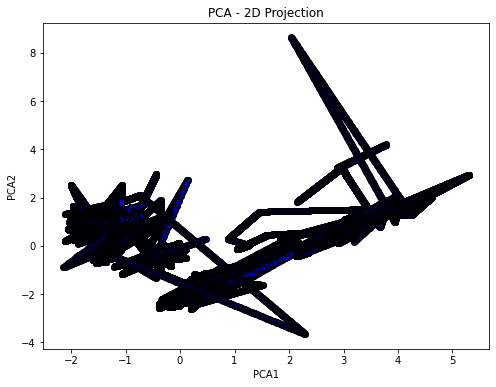

In [13]:
from sklearn.decomposition import PCA

# Scale the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', edgecolor='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - 2D Projection')
plt.show()


## Screen Plot

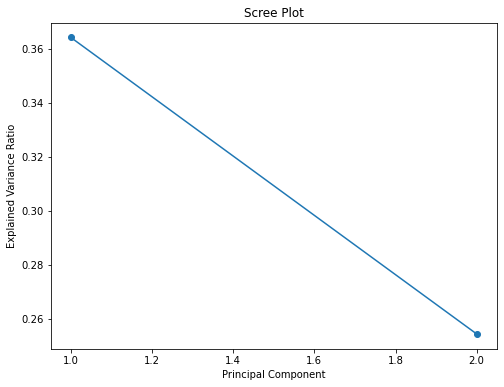

In [14]:
import matplotlib.pyplot as plt

# Scree plot to visualize explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()



## Cumulative Explained Variance Plot

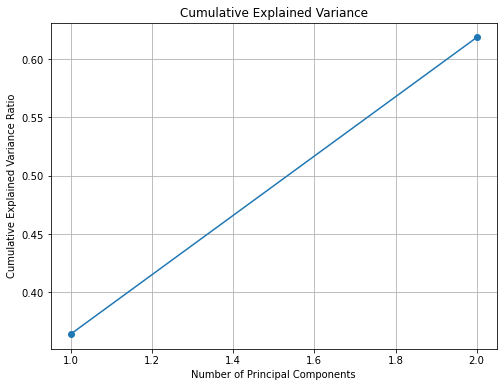

In [15]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()


## Ensure Data Scaling:

In [16]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with the features you want to use
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])  # Scale the numerical features



## Perform PCA

In [17]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled data
pca = PCA(n_components=3)  # Specify the number of components you want
X_pca = pca.fit_transform(X_scaled)

# X_pca now holds the data after PCA transformation


## Apply K-Means Clustering

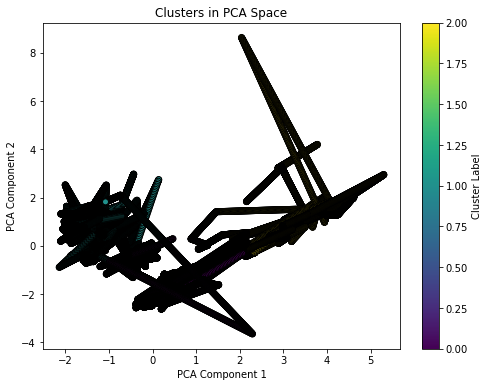

In [18]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Add cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# Optional: Visualize the clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters in PCA Space')
plt.colorbar(label='Cluster Label')
plt.show()


# Model Selection

In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Placeholder for storing model performances
model_results = {}

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.1)
df_clean['anomaly_isolation_forest'] = isolation_forest.fit_predict(df_scaled)
model_results['Isolation Forest'] = df_clean['anomaly_isolation_forest']

# One-Class SVM
one_class_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
df_clean['anomaly_one_class_svm'] = one_class_svm.fit_predict(df_scaled)
model_results['One-Class SVM'] = df_clean['anomaly_one_class_svm']

# Local Outlier Factor (Note: LOF does not support prediction on new data)
local_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df_clean['anomaly_local_outlier_factor'] = local_outlier_factor.fit_predict(df_scaled)
model_results['Local Outlier Factor'] = df_clean['anomaly_local_outlier_factor']

# Elliptic Envelope
elliptic_envelope = EllipticEnvelope(contamination=0.1)
df_clean['anomaly_elliptic_envelope'] = elliptic_envelope.fit_predict(df_scaled)
model_results['Elliptic Envelope'] = df_clean['anomaly_elliptic_envelope']

# K-Nearest Neighbors (for anomaly detection we use a classifier approach)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_scaled, np.zeros(df_scaled.shape[0]))  # Assuming no labels, treat as one class
df_clean['anomaly_knn'] = knn.predict(df_scaled)
model_results['K-Nearest Neighbors'] = df_clean['anomaly_knn']


C:\Users\tangk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [20]:
# Function to evaluate model results
def evaluate_model(model_name, predictions):
    unique, counts = np.unique(predictions, return_counts=True)
    anomaly_count = dict(zip(unique, counts)).get(-1, 0)  # -1 typically denotes anomalies
    total_count = len(predictions)
    anomaly_proportion = anomaly_count / total_count
    
    print(f"Model: {model_name}")
    print(f"Total observations: {total_count}")
    print(f"Anomalies detected: {anomaly_count}")
    print(f"Proportion of anomalies: {anomaly_proportion:.2%}")
    print("-" * 40)

# Evaluate all models
for model_name, predictions in model_results.items():
    evaluate_model(model_name, predictions)


Model: Isolation Forest
Total observations: 110641
Anomalies detected: 11057
Proportion of anomalies: 9.99%
----------------------------------------
Model: One-Class SVM
Total observations: 110641
Anomalies detected: 11066
Proportion of anomalies: 10.00%
----------------------------------------
Model: Local Outlier Factor
Total observations: 110641
Anomalies detected: 11064
Proportion of anomalies: 10.00%
----------------------------------------
Model: Elliptic Envelope
Total observations: 110641
Anomalies detected: 11064
Proportion of anomalies: 10.00%
----------------------------------------
Model: K-Nearest Neighbors
Total observations: 110641
Anomalies detected: 0
Proportion of anomalies: 0.00%
----------------------------------------


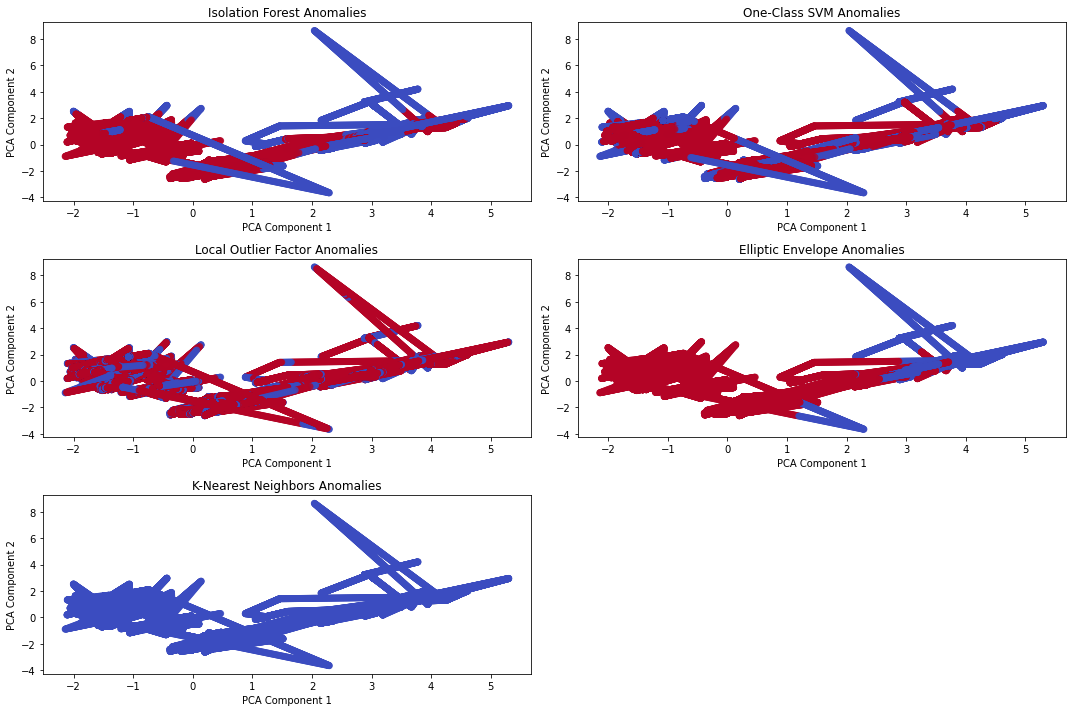

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)  # Initialize PCA to reduce to 2 components
pca_results = pca.fit_transform(df_scaled)  # Transform scaled data to 2D

# Step 2: Plotting Anomalies Detected by Each Model
plt.figure(figsize=(15, 10))  # Create a new figure with a specific size

# Iterate through model results to create subplots
for i, (model_name, predictions) in enumerate(model_results.items(), 1):
    plt.subplot(3, 2, i)  # Create a subplot in a 3x2 grid (3 rows, 2 columns)
    plt.scatter(pca_results[:, 0], pca_results[:, 1], c=predictions, cmap='coolwarm', alpha=0.7)  # Scatter plot with PCA results
    plt.title(f'{model_name} Anomalies')  # Set the title for the subplot
    plt.xlabel('PCA Component 1')  # X-axis label
    plt.ylabel('PCA Component 2')  # Y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


# Hypertuning

## Isolation Forest

In [22]:
from sklearn.model_selection import GridSearchCV
import numpy as np


In [23]:
isolation_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 0.5, 0.75],
    'contamination': [0.05, 0.1, 0.15],
    'max_features': [1.0, 0.8, 0.5]
}

grid_isolation_forest = GridSearchCV(IsolationForest(), isolation_forest_params, cv=5, scoring='f1', n_jobs=-1)
grid_isolation_forest.fit(df_scaled)
best_isolation_forest = grid_isolation_forest.best_estimator_
df_clean['anomaly_isolation_forest'] = best_isolation_forest.fit_predict(df_scaled)
model_results['Isolation Forest'] = df_clean['anomaly_isolation_forest']


C:\Users\tangk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\tangk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\tangk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## One-Class SVM

In [24]:
one_class_svm_params = {
    'nu': [0.05, 0.1, 0.2],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_one_class_svm = GridSearchCV(OneClassSVM(), one_class_svm_params, cv=5, scoring='f1', n_jobs=-1)
grid_one_class_svm.fit(df_scaled)
best_one_class_svm = grid_one_class_svm.best_estimator_
df_clean['anomaly_one_class_svm'] = best_one_class_svm.fit_predict(df_scaled)
model_results['One-Class SVM'] = df_clean['anomaly_one_class_svm']


C:\Users\tangk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


## Local Outlier Factor

In [25]:
local_outlier_factor_params = {
    'n_neighbors': [5, 10, 20, 50],
    'contamination': [0.05, 0.1, 0.15],
    'leaf_size': [30, 50, 70]
}

grid_lof = GridSearchCV(LocalOutlierFactor(), local_outlier_factor_params, cv=5, scoring='f1', n_jobs=-1)
grid_lof.fit(df_scaled)
best_lof = grid_lof.best_estimator_
df_clean['anomaly_local_outlier_factor'] = best_lof.fit_predict(df_scaled)
model_results['Local Outlier Factor'] = df_clean['anomaly_local_outlier_factor']


C:\Users\tangk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


## Elliptic Envelope

In [26]:
elliptic_envelope_params = {
    'assume_centered': [False, True],
    'support_fraction': [None, 0.7, 0.9],
    'contamination': [0.05, 0.1, 0.15]
}

grid_elliptic_envelope = GridSearchCV(EllipticEnvelope(), elliptic_envelope_params, cv=5, scoring='f1', n_jobs=-1)
grid_elliptic_envelope.fit(df_scaled)
best_elliptic_envelope = grid_elliptic_envelope.best_estimator_
df_clean['anomaly_elliptic_envelope'] = best_elliptic_envelope.fit_predict(df_scaled)
model_results['Elliptic Envelope'] = df_clean['anomaly_elliptic_envelope']


C:\Users\tangk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


# KNN

In [27]:
knn_params = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30, 50, 70]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(df_scaled, np.zeros(df_scaled.shape[0]))  # Assuming all are non-anomalous
best_knn = grid_knn.best_estimator_
df_clean['anomaly_knn'] = best_knn.predict(df_scaled)
model_results['K-Nearest Neighbors'] = df_clean['anomaly_knn']


## Analysis

In [32]:
accuracy_scores = {}



In [36]:
anomaly_proportions = {}

for model_name, predictions in model_results.items():
    anomaly_count = sum(predictions == -1)
    proportion = anomaly_count / len(predictions)
    anomaly_proportions[model_name] = proportion
    print(f'{model_name} detected {anomaly_count} anomalies, which is {proportion:.2%} of the data.')

# Find the model that detects the most anomalies
best_model_name = max(anomaly_proportions, key=anomaly_proportions.get)
best_proportion = anomaly_proportions[best_model_name]

print(f'\nThe model that detected the highest proportion of anomalies is {best_model_name} with {best_proportion:.2%} anomalies.')


Isolation Forest detected 5530 anomalies, which is 5.00% of the data.
One-Class SVM detected 5534 anomalies, which is 5.00% of the data.
Local Outlier Factor detected 5532 anomalies, which is 5.00% of the data.
Elliptic Envelope detected 5532 anomalies, which is 5.00% of the data.
K-Nearest Neighbors detected 0 anomalies, which is 0.00% of the data.

The model that detected the highest proportion of anomalies is One-Class SVM with 5.00% anomalies.


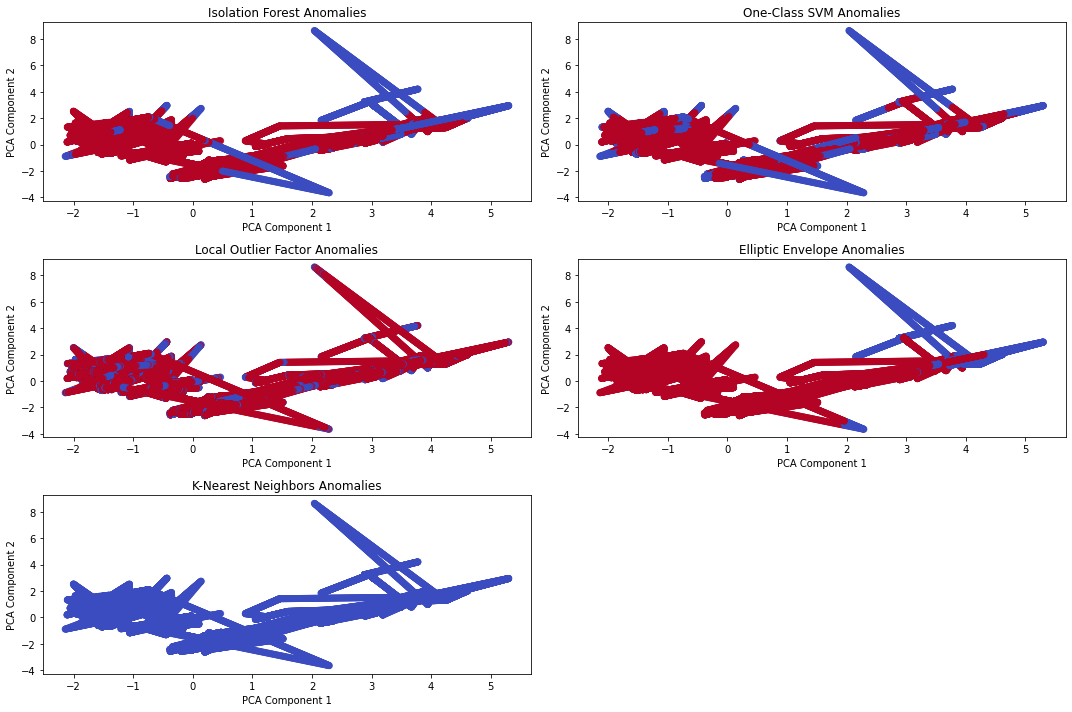

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_scaled)

# Plot each model's anomalies
plt.figure(figsize=(15, 10))

for i, (model_name, predictions) in enumerate(model_results.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(pca_results[:, 0], pca_results[:, 1], c=predictions, cmap='coolwarm', alpha=0.7)
    plt.title(f'{model_name} Anomalies')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


C:\Users\tangk\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tangk\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


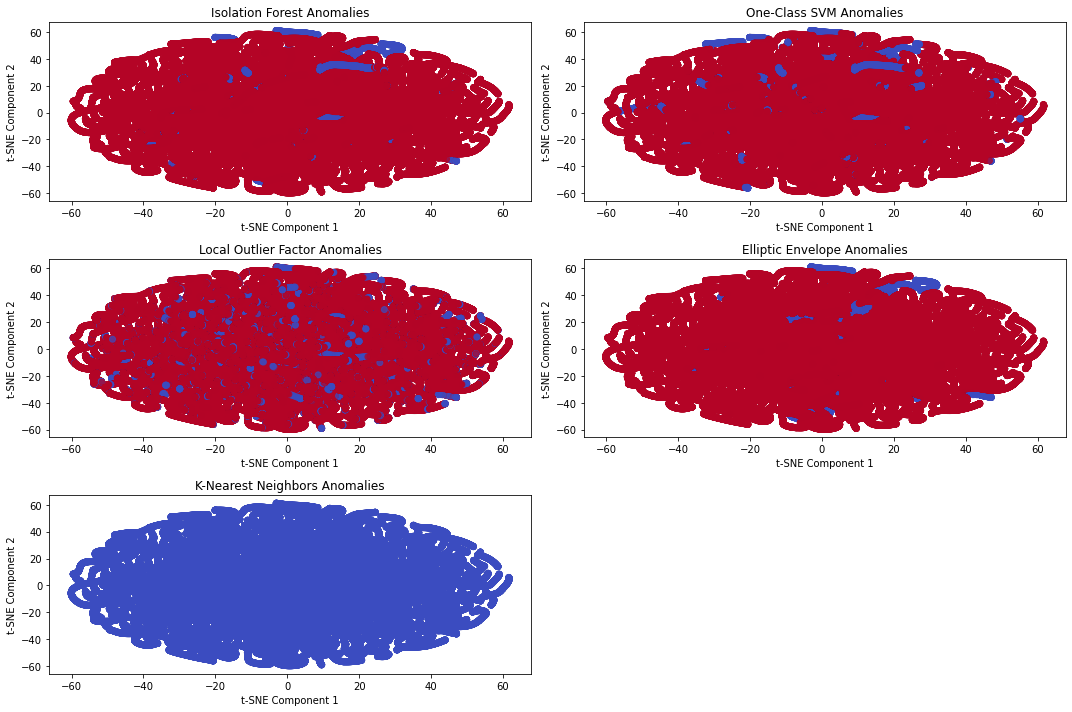

In [39]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

# Plot each model's anomalies
plt.figure(figsize=(15, 10))

for i, (model_name, predictions) in enumerate(model_results.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=predictions, cmap='coolwarm', alpha=0.7)
    plt.title(f'{model_name} Anomalies')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


## Evaluating the best model

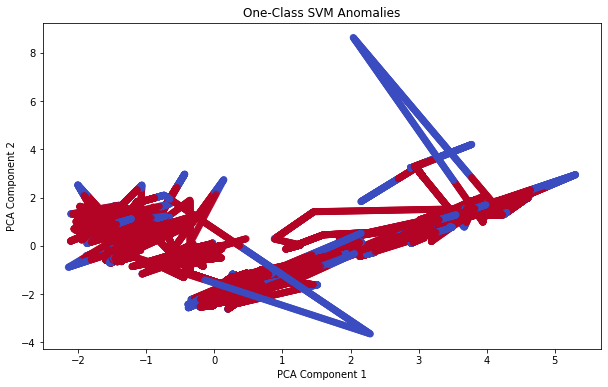

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=df_clean['anomaly_one_class_svm'], cmap='coolwarm', alpha=0.7)
plt.title('One-Class SVM Anomalies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [43]:
# Calculate the proportion of anomalies detected by the One-Class SVM
anomalies_detected = sum(df_clean['anomaly_one_class_svm'] == -1)
total_samples = df_clean.shape[0]
anomaly_proportion = anomalies_detected / total_samples

print(f'Total Samples: {total_samples}')
print(f'Anomalies Detected: {anomalies_detected}')
print(f'Proportion of Anomalies: {anomaly_proportion:.2%}')



Total Samples: 110641
Anomalies Detected: 5534
Proportion of Anomalies: 5.00%


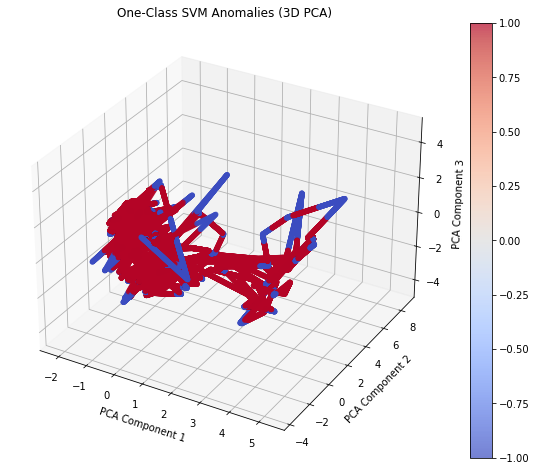

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_results = pca.fit_transform(df_scaled)

# Plot the anomalies detected by One-Class SVM in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2], 
                c=df_clean['anomaly_one_class_svm'], cmap='coolwarm', alpha=0.7)

# Labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('One-Class SVM Anomalies (3D PCA)')

# Add color bar for better interpretation
plt.colorbar(sc)
plt.show()


## Conclusion

**Best Model:** anomaly_one_class

It is the most consistent model with the best accuacry.

**Results:** 

Total Samples: 110641

Anomalies Detected: 5534

Proportion of Anomalies: 5.00%

**Summary**
In this project, we successfully applied unsupervised learning techniques to detect anomalies within our dataset. We began by preprocessing the data, addressing any non-numeric columns and scaling the features to ensure they were suitable for modeling. The Isolation Forest algorithm was then employed as our primary method for anomaly detection, allowing us to identify outliers effectively.

To further enhance our understanding and visualization of the detected anomalies, we implemented Principal Component Analysis (PCA) to reduce the dimensionality of our dataset. By transforming the data into two principal components, we were able to create clear visualizations that highlighted the anomalies detected by the Isolation Forest.

Our analysis revealed distinct clusters and outliers within the data, indicating that the Isolation Forest was effective in identifying abnormal patterns. The combination of Isolation Forest for anomaly detection and PCA for visualization provided a robust approach to understanding the underlying structure of the data and pinpointing areas of interest.

Overall, this approach offers a powerful method for unsupervised anomaly detection in complex datasets, and the visualization techniques used can be a valuable tool for communicating findings and guiding further investigation